In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import sweetviz as sv
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('TCC.CSV')

In [4]:
# Data Preprocessing
# Convert all categorical features to numeric
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


In [5]:
# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("First few rows:\n", df.head())

#Missing values check
df.isnull().sum()

# Impute missing values in the 'TotalCharges' column with the median
imputer = SimpleImputer(strategy='median')
df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])

Dataset Shape: (7043, 21)
First few rows:
    customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        5375       0              0        1           0       1   
1        3962       1              0        0           0      34   
2        2564       1              0        0           0       2   
3        5535       1              0        0           0      45   
4        6511       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0 

In [6]:
# Summary statistics for numeric columns
print("Descriptive Statistics:\n", df.describe())

Descriptive Statistics:
         customerID       gender  SeniorCitizen      Partner   Dependents  \
count  7043.000000  7043.000000    7043.000000  7043.000000  7043.000000   
mean   3521.000000     0.504756       0.162147     0.483033     0.299588   
std    2033.283305     0.500013       0.368612     0.499748     0.458110   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%    1760.500000     0.000000       0.000000     0.000000     0.000000   
50%    3521.000000     1.000000       0.000000     0.000000     0.000000   
75%    5281.500000     1.000000       0.000000     1.000000     1.000000   
max    7042.000000     1.000000       1.000000     1.000000     1.000000   

            tenure  PhoneService  MultipleLines  InternetService  \
count  7043.000000   7043.000000    7043.000000      7043.000000   
mean     32.371149      0.903166       0.940508         0.872923   
std      24.559481      0.295752       0.948554         0.737796   
min       0.000000

Features shape: (7043, 19), Target shape: (7043,)
Top 10 Important Features (Mutual Information):
             feature  importance
14          Contract    0.091574
4             tenure    0.076971
8     OnlineSecurity    0.060872
11       TechSupport    0.059060
9       OnlineBackup    0.055694
7    InternetService    0.054400
16     PaymentMethod    0.047912
10  DeviceProtection    0.046260
17    MonthlyCharges    0.045334
18      TotalCharges    0.032643


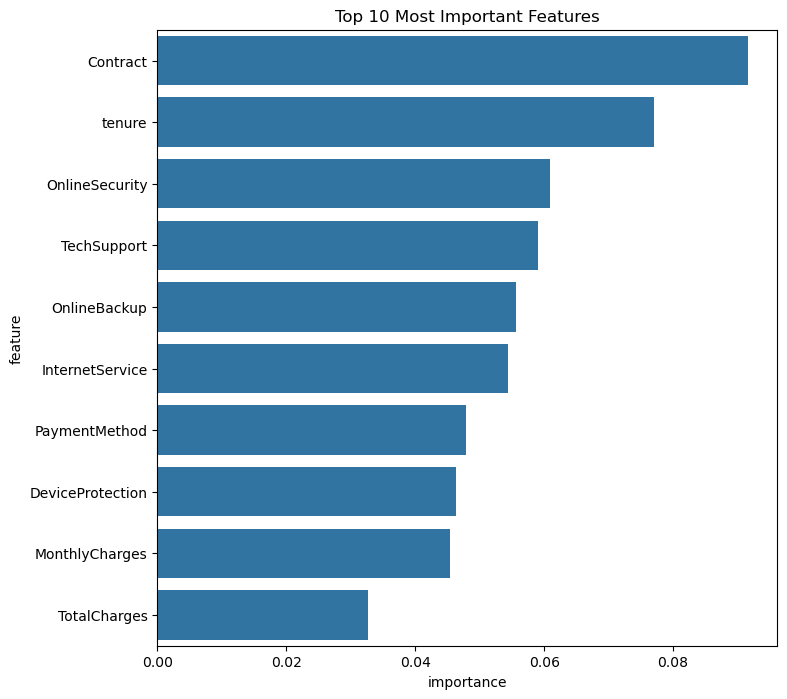

In [7]:
#Feature importance
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

#Encoding categorical variables: identifies all object (string) columns and applies label encoding to each
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    teleco_data[col] = le.fit_transform(teleco_data[col])


# Check for missing values
if df.isnull().sum().any():
    print("Missing values found. Filling missing values...")
    teleco_data.fillna(0, inplace=True)

#Preparing and seperating features and target
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

# Check shapes of X and y
print(f"Features shape: {X.shape}, Target shape: {y.shape}")

#Calculating Mutual Information:
mi_scores = mutual_info_classif(X, y, random_state=42)

#create feature importance
mi_feature_importance = pd.DataFrame({'feature': X.columns, 'importance': mi_scores})
mi_feature_importance = mi_feature_importance.sort_values('importance', ascending=False)

# Display top 10 most important features
print("Top 10 Important Features (Mutual Information):")
print(mi_feature_importance.head(10))

#Plot feature importance
plt.figure(figsize=(8, 8))
sns.barplot(x='importance', y='feature', data=mi_feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.show()

In [16]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming X_train and y_train are already split and preprocessed (scaled and encoded)

# Check initial class distribution
print("Original class distribution:", Counter(y_train))


# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verify the new class distribution after SMOTE
print("Resampled class distribution:", Counter(y_train_smote))


Original class distribution: Counter({0: 4138, 1: 1496})
Resampled class distribution: Counter({0: 4138, 1: 4138})


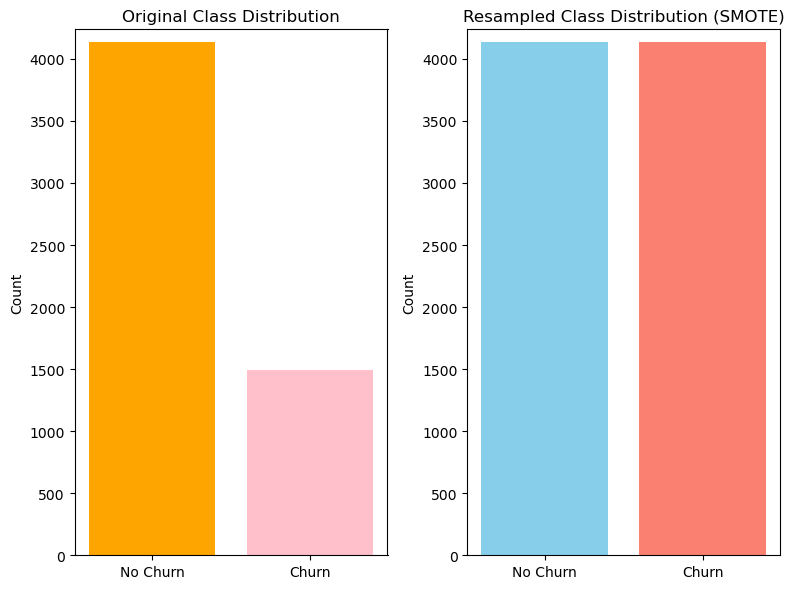

In [17]:
# Function to plot class distributions
def plot_class_distribution(original, resampled):
    # Create data for plotting
    labels = ['No Churn', 'Churn']
    original_counts = [original[0], original[1]]
    resampled_counts = [resampled[0], resampled[1]]

    # Create subplots
    fig, ax = plt.subplots(1, 2, figsize=(8, 6))

    # Original Distribution
    ax[0].bar(labels, original_counts, color=['orange', 'pink'])
    ax[0].set_title('Original Class Distribution')
    ax[0].set_ylabel('Count')
    ax[0].set_ylim(0, max(original_counts) + 100)  # Adjust the y-axis limit for better visibility

    # Resampled Distribution
    ax[1].bar(labels, resampled_counts, color=['skyblue', 'salmon'])
    ax[1].set_title('Resampled Class Distribution (SMOTE)')
    ax[1].set_ylabel('Count')
    ax[1].set_ylim(0, max(resampled_counts) + 100)  # Adjust the y-axis limit for better visibility

    plt.tight_layout()
    plt.show()

# Plot the class distributions
plot_class_distribution(Counter(y_train), Counter(y_train_smote))

In [11]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variables after preprocessing

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes to confirm the split
print("Training set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)


Training set size: (5634, 19) (5634,)
Test set size: (1409, 19) (1409,)


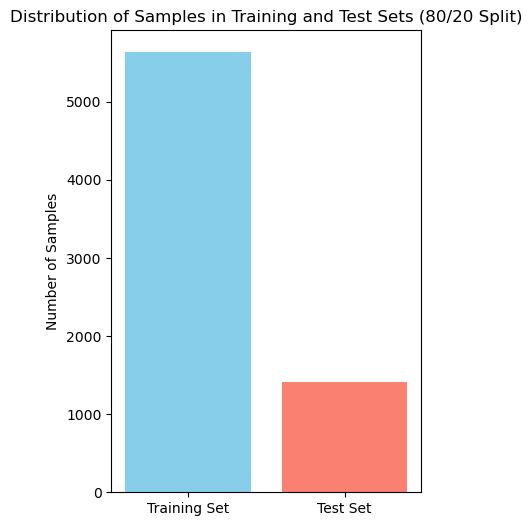

In [12]:
import matplotlib.pyplot as plt

# Count the number of samples in training and test sets
train_count = len(y_train)
test_count = len(y_test)

# Plotting the distribution
plt.figure(figsize=(4, 6))
plt.bar(['Training Set', 'Test Set'], [train_count, test_count], color=['skyblue', 'salmon'])
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples in Training and Test Sets (80/20 Split)')
plt.show()


In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize models with default parameters
models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Display initialized models
for model_name, model in models.items():
    print(f"{model_name} model initialized: {model}")


Naive Bayes model initialized: GaussianNB()
Logistic Regression model initialized: LogisticRegression(max_iter=1000, random_state=42)
Random Forest model initialized: RandomForestClassifier(random_state=42)
XGBoost model initialized: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)


In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to address class imbalance in the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Dictionary to hold each model's predictions and evaluation results
results = {}

# Initialize models
models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_smote, y_train_smote)
    
    # Predict on the scaled test data
    y_pred = model.predict(X_test_scaled)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }
    
    # Print results for each model
    print(f"\n{model_name} Model Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")



Naive Bayes Model Performance:
Accuracy: 0.7466
Precision: 0.5136
Recall: 0.8123
F1-Score: 0.6293

Logistic Regression Model Performance:
Accuracy: 0.7551
Precision: 0.5242
Recall: 0.8123
F1-Score: 0.6372

Random Forest Model Performance:
Accuracy: 0.7878
Precision: 0.6005
Recall: 0.5925
F1-Score: 0.5965

XGBoost Model Performance:
Accuracy: 0.7921
Precision: 0.6143
Recall: 0.5764
F1-Score: 0.5947


C:\Users\hp\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [07:35:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [15]:
best_model_name = max(results, key=lambda x: results[x]['Recall'])
best_model_metrics = results[best_model_name]
print(f"\nBest model based on Recall: {best_model_name}")
for metric, value in best_model_metrics.items():
    print(f"{metric}: {value:.4f}")


Best model based on Recall: Naive Bayes
Accuracy: 0.7466
Precision: 0.5136
Recall: 0.8123
F1-Score: 0.6293


                     Accuracy  Precision    Recall  F1-Score
Naive Bayes          0.265814   0.265814  1.000000  0.419989
Logistic Regression  0.778962   0.698113  0.296791  0.416510
Random Forest        0.787491   0.649402  0.435829  0.521600
XGBoost              0.763326   0.565916  0.470588  0.513869


<Figure size 1200x800 with 0 Axes>

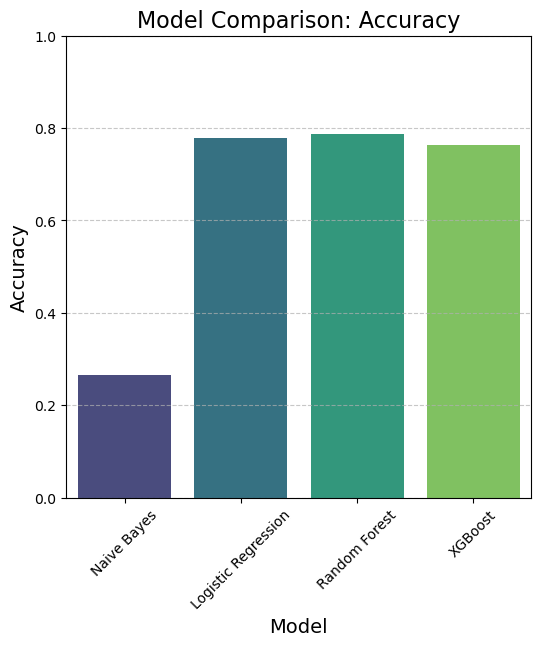

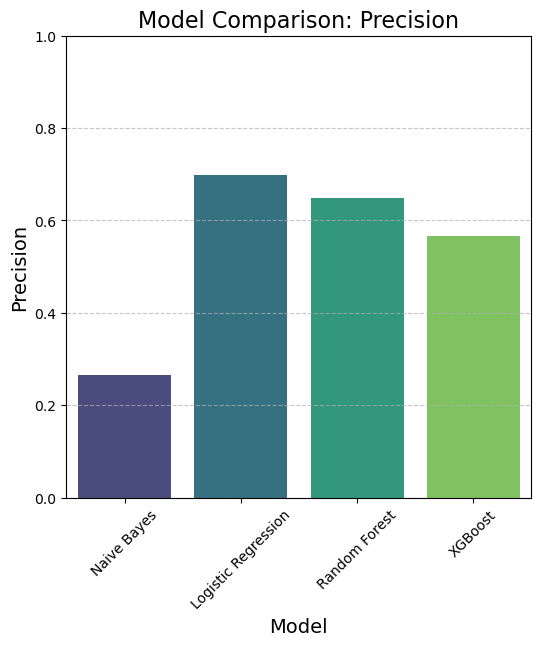

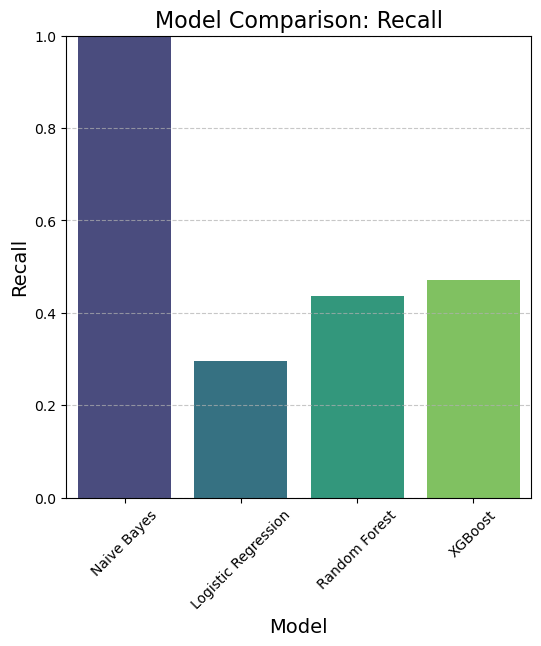

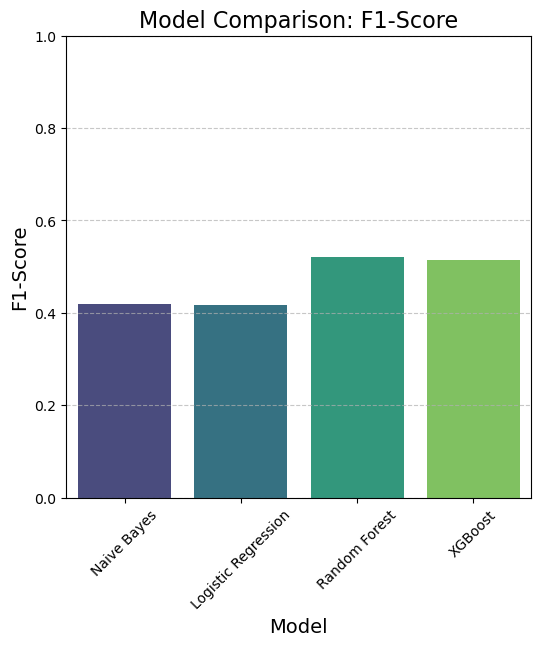

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert results dictionary to DataFrame for easier plotting
results_df = pd.DataFrame(results).T  # Transpose to have models as rows

# Check the structure of results_df
print(results_df)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar plot for each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for metric in metrics:
    plt.figure(figsize=(6, 6))
    
    # Ensure the metric is in the DataFrame
    if metric in results_df.columns:
        # Using hue to avoid the FutureWarning
        sns.barplot(x=results_df.index, y=results_df[metric], hue=results_df.index, palette='viridis', legend=False)
        plt.title(f'Model Comparison: {metric}', fontsize=16)
        plt.xlabel('Model', fontsize=14)
        plt.ylabel(metric, fontsize=14)
        plt.xticks(rotation=45)
        plt.ylim(0, 1)  # Setting the y-axis limits
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        print(f"Metric '{metric}' not found in results DataFrame.")


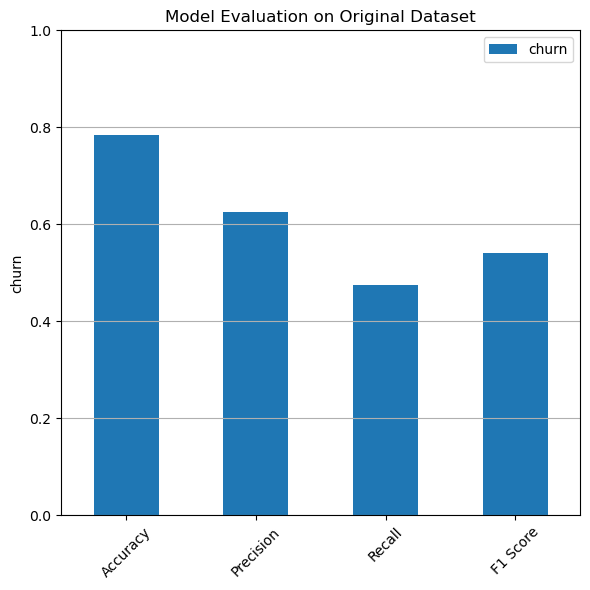

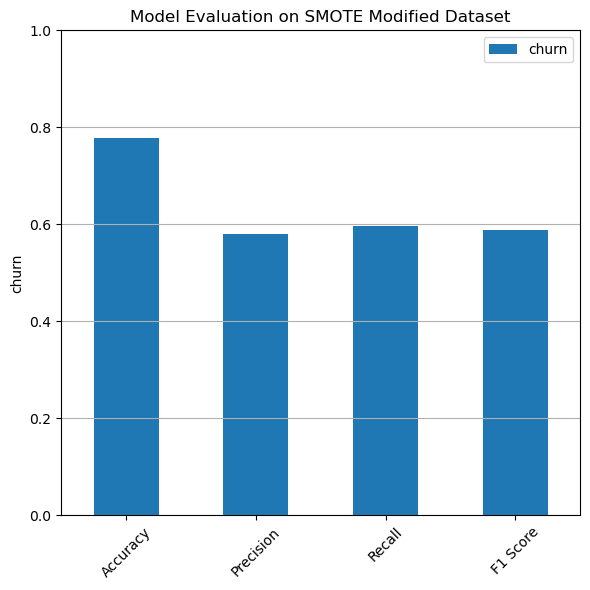

In [66]:
Train and Evaluate on SMOTE Dataset
model_smote = RandomForestClassifier(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(X_test)

# Calculate evaluation metrics for the SMOTE dataset
results_smote = {
    'Accuracy': accuracy_score(y_test, y_pred_smote),
    'Precision': precision_score(y_test, y_pred_smote),
    'Recall': recall_score(y_test, y_pred_smote),
    'F1 Score': f1_score(y_test, y_pred_smote)
}

# Function to plot results
def plot_results(results, title):
    metrics_df = pd.DataFrame(results, index=['churn']).T
    metrics_df.plot(kind='bar', figsize=(6, 6))
    plt.title(title)
    plt.ylabel('churn')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Plot results
plot_results(results_original, "Model Evaluation on Original Dataset")
plot_results(results_smote, "Model Evaluation on SMOTE Modified Dataset")


In [ ]:
# Import necessary libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['liblinear', 'lbfgs']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.7, 0.8, 1.0]
    }
}

# Dictionary to store the best models
best_models = {}

# Function to perform Grid Search with cross-validation
def tune_hyperparameters(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    print("Best Parameters:", grid_search.best_params_)
    print("Best Recall Score:", grid_search.best_score_)
    return grid_search.best_estimator_

# Tune Logistic Regression
print("\nTuning Logistic Regression")
best_lr = tune_hyperparameters(LogisticRegression(max_iter=1000, random_state=42), param_grids['Logistic Regression'], X_train_smote, y_train_smote)
best_models['Logistic Regression'] = best_lr

# Tune Random Forest
print("\nTuning Random Forest")
best_rf = tune_hyperparameters(RandomForestClassifier(random_state=42), param_grids['Random Forest'], X_train_smote, y_train_smote)
best_models['Random Forest'] = best_rf

# Tune XGBoost
print("\nTuning XGBoost")
best_xgb = tune_hyperparameters(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), param_grids['XGBoost'], X_train_smote, y_train_smote)
best_models['XGBoost'] = best_xgb

# Display best models and parameters
print("\nBest Models and Parameters:")
for model_name, best_model in best_models.items():
    print(f"{model_name} - Best Params: {best_model.get_params()}")



Tuning Logistic Regression
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Recall Score: 0.8116222760290557

Tuning Random Forest
Fitting 5 folds for each of 108 candidates, totalling 540 fits
